# Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 



You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #importing necessary libraries

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df  #importing and printing the dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
type(df) #understanding the type of dataset

pandas.core.frame.DataFrame

In [4]:
df.head() #check dataframe head

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()  #check dataframe tail

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.sample(3) #printing 3 sample data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
391,M,0.475,0.375,0.125,0.5930,0.2770,0.1150,0.1800,10
1006,M,0.605,0.470,0.165,1.2315,0.6025,0.2620,0.2925,11
2478,F,0.470,0.355,0.180,0.4410,0.1525,0.1165,0.1350,8


In [7]:
df.columns  #checking the column names

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df.isnull().sum() #checking null values in each column

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df.isnull().sum().sum() #rechecking for nulls 

0

In [10]:
df.dtypes #checking datatypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [11]:
type(df.columns) #checking column type

pandas.core.indexes.base.Index

In [12]:
df.info() #detailed info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


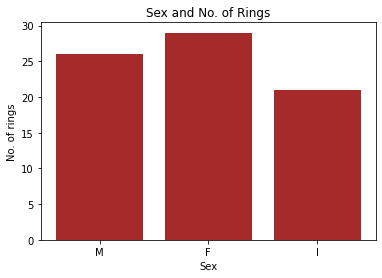

In [13]:
# Creating the fig, ax
fig, ax = plt.subplots()

# Creating bar plot of first 1000 data entries 
ax.bar(df["Sex"][:1000], df["Rings"][:1000], color="brown")

#x is horizonatal axis, y is vertical
ax.set(title="Sex and No. of Rings", 
       xlabel="Sex",
       ylabel="No. of rings");  #vizualizing the statistics between sex and no. of rings

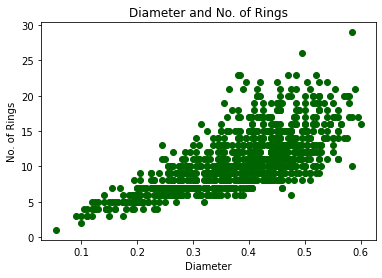

In [14]:
# Creating the fig, ax
fig, ax = plt.subplots()

# Creating a scatter plot with first 1000 data points
ax.scatter(df["Diameter"][:1000], df["Rings"][:1000], color="darkgreen")

# Creating a legend
ax.set(title="Diameter and No. of Rings",
       xlabel="Diameter",
       ylabel="No. of Rings");   #vizualizing the statistics between diameter and no. of rings

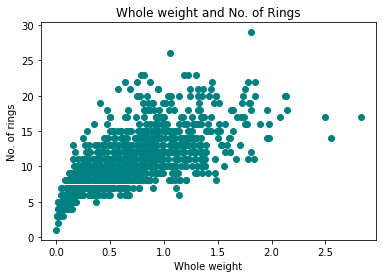

In [15]:
# Create fig, ax
fig, ax = plt.subplots()

# Create scatter plot of first 1000 data points
ax.scatter(df["Whole weight"][:1000], df["Rings"][:1000], color="teal")

#Create a legend
ax.set(title="Whole weight and No. of Rings",
       xlabel="Whole weight",
       ylabel="No. of rings");   #vizualizing the statistics between whole weight and no. of rings

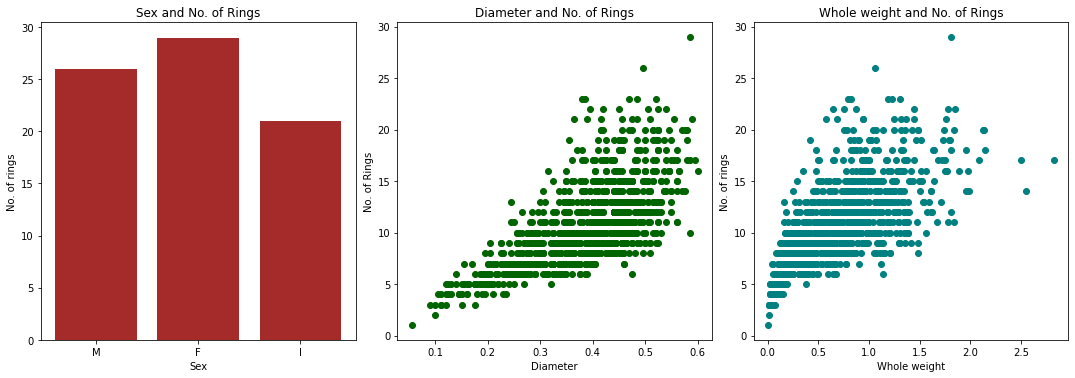

In [16]:
# Creating  a fig, ax
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) 
fig.tight_layout()  

#Sex and nr. of Rings
ax1.bar(df["Sex"][:1000], df["Rings"][:1000], color="brown")
ax1.set(title="Sex and No. of Rings", 
       xlabel="Sex",
       ylabel="No. of rings");

# Diameter and nr. of Rings
ax2.scatter(df["Diameter"][:1000], df["Rings"][:1000], color="darkgreen")
ax2.set(title="Diameter and No. of Rings",
       xlabel="Diameter",
       ylabel="No. of Rings"); 

# Whole weight and nr. of Rings
ax3.scatter(df["Whole weight"][:1000], df["Rings"][:1000], color="teal")
ax3.set(title="Whole weight and No. of Rings",
       xlabel="Whole weight",
       ylabel="No. of rings");


As there are no null values present we may proceed further. 

In [17]:
df["Sex"].value_counts()  #categorizing the Sex data type

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [18]:
df["Sex"] = df["Sex"].astype("category").cat.as_ordered() #changing the categorical values to numerical 

df.info()

In [19]:
# Applying LabelEncoder to transform the categorical values into numerical
from sklearn.preprocessing import LabelEncoder


l_encoder = LabelEncoder()

# transform data
df["Sex"] =  l_encoder.fit_transform(df["Sex"])

In [20]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Here Male = 2, Female = 0 and Infant = 1 as the values are assigned as per aphabelical order

In [21]:
df.info() #now all values will be numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [22]:
# As per question adding age column
df["Age"] = df["Rings"] + 1.5

# Removing rings column
df.drop("Rings", axis=1, inplace=True)

In [23]:
df.head() #checking output in the dataset, here age of abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [24]:
import sklearn

In [25]:
# Split data into X and y
X = df.drop("Age", axis=1) #here we are dropping the entire column with axis=1
y = df["Age"]

In [26]:
X[:20]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320


In [27]:
y[:20]

0     16.5
1      8.5
2     10.5
3     11.5
4      8.5
5      9.5
6     21.5
7     17.5
8     10.5
9     20.5
10    15.5
11    11.5
12    12.5
13    11.5
14    11.5
15    13.5
16     8.5
17    11.5
18     8.5
19    10.5
Name: Age, dtype: float64

In [28]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=14) #we choose a random number for random_state to make our results reproducable

In [29]:
# See the length of the sets
len(X_train), len(y_train), len(X_test), len(y_test)

(3132, 3132, 1045, 1045)

In [30]:
# import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14)

# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [31]:
# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [32]:
# fit the model again
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [33]:
show_score(rf)

{'Training MAE': 0.5709163473818647,
 'Test MAE': 1.521425837320574,
 'Training MSE': 0.00329428814295143,
 'Test MSE': 0.024151890733698493,
 'Training RMSE': 0.05739588959979129,
 'Test RMSE': 0.15540878589609564,
 'Training R2': 0.9364929642610078,
 'Test R2': 0.5464685234214433}

We observe that the error in test sets is much higher than the training data. This is a good thing as the machine has already learned the correct answer. At the same time, the error in the test sets is higher because the model does not know the answers to the test data. We can visualize the actual responses along with the predicted ones to see the error more clearly.

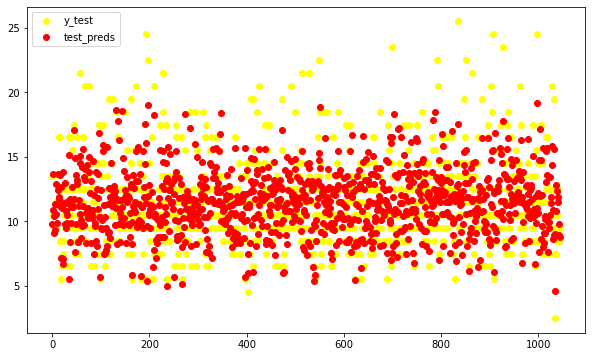

In [34]:
# Predict the labels on test data
test_preds = rf.predict(X_test) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="yellow", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds, color="red", label="test_preds")
plt.legend();

In [35]:
#Check current parameters
from pprint import pprint

print("Current parameters:")
pprint(rf.get_params())

Current parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}


In [36]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=14),
                              param_distributions=rf_grid, 
                              n_iter=100, # n_iter = 100 means that the model will fit 100 for different combinations of parameters
                              cv=5, # number of cross-validation folds for each set of parameters
                              verbose=True) # requesting more elaborate output in the log

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [37]:
# Score of the RandomizedSearchCV model
show_score(rs_model)

{'Training MAE': 0.9619986580276155,
 'Test MAE': 1.4967361681842162,
 'Training MSE': 0.009372563838576558,
 'Test MSE': 0.022934074594974638,
 'Training RMSE': 0.0968120025543143,
 'Test RMSE': 0.15144000328504564,
 'Training R2': 0.8141790556011506,
 'Test R2': 0.5663396557188147}

In [38]:
# Score of original RandomForest model
show_score(rf)

{'Training MAE': 0.5709163473818647,
 'Test MAE': 1.521425837320574,
 'Training MSE': 0.00329428814295143,
 'Test MSE': 0.024151890733698493,
 'Training RMSE': 0.05739588959979129,
 'Test RMSE': 0.15540878589609564,
 'Training R2': 0.9364929642610078,
 'Test R2': 0.5464685234214433}

In [39]:
# Check most ideal params
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'max_depth': None}

In [40]:
# Ideal model 

ideal_model = RandomForestRegressor(max_depth=None,
                                    max_features=0.5,
                                    min_samples_leaf=5,
                                    min_samples_split=5,
                                    n_estimators=200)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=200)

In [41]:
# Score of the deal model 
show_score(ideal_model)

{'Training MAE': 1.0837442623661246,
 'Test MAE': 1.4823310249767054,
 'Training MSE': 0.011959307515284193,
 'Test MSE': 0.022757871052739485,
 'Training RMSE': 0.10935861884316295,
 'Test RMSE': 0.15085712131927842,
 'Training R2': 0.7627247526737873,
 'Test R2': 0.567898742469076}

In [42]:
# The original RandomForest model
show_score(rf)

{'Training MAE': 0.5709163473818647,
 'Test MAE': 1.521425837320574,
 'Training MSE': 0.00329428814295143,
 'Test MSE': 0.024151890733698493,
 'Training RMSE': 0.05739588959979129,
 'Test RMSE': 0.15540878589609564,
 'Training R2': 0.9364929642610078,
 'Test R2': 0.5464685234214433}

In [43]:
# Make predictions on test data
test_preds = ideal_model.predict(X_test)
test_preds [:20], y_test[:20]

(array([ 9.92116946, 13.00728934, 10.41545714,  9.37765445, 10.64180937,
         9.54610285, 11.36136525, 10.72210716, 12.27175369, 11.33944523,
         9.96557595, 13.57865237, 12.41899733, 11.5715469 , 11.89184171,
        10.82700166, 13.93821712,  7.25218772, 11.92054908,  7.54331309]),
 2374    13.5
 3341    13.5
 3361    10.5
 2574     9.5
 1624    10.5
 2874     9.5
 3908    10.5
 1302     9.5
 3771    11.5
 1024    11.5
 629     11.5
 890     12.5
 585     12.5
 2328    16.5
 2920    11.5
 1766     8.5
 778     16.5
 4119     5.5
 648     12.5
 538      6.5
 Name: Age, dtype: float64)

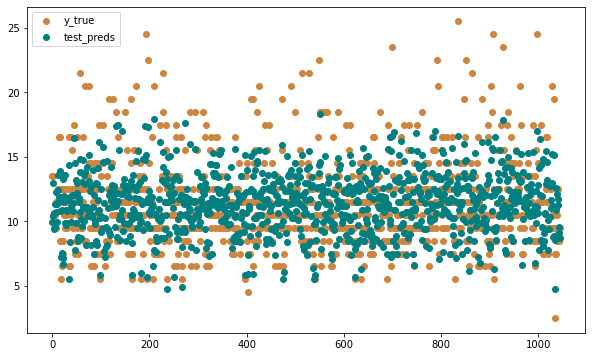

In [44]:
# Visualize predicted and true values

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="peru", label="y_true")
plt.scatter(range(y_test.shape[0]), test_preds, color="teal", label="test_preds")
plt.legend();

We can see there are some overlapping between true and predicted data. This indicates that the model is doing good. Now, we may try finding which data or input variable has a major influence on output. 

In [45]:
# Create a function that finds feature importances
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
    .sort_values("feature_importances", ascending=False) # sort importances from the biggest to the smallest
    .reset_index(drop=True)) # deletes the index number

#Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20], color="skyblue")
    ax.set_ylabel("Features")
    ax.set_label("Feature importance")
    ax.invert_yaxis()

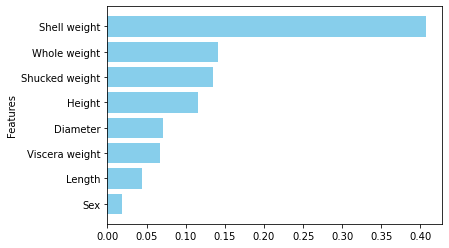

In [46]:
plot_features(X_train.columns, ideal_model.feature_importances_)

This indicates the shell weight is the most important. Shucked and whole weight has similar influence whereas sex of abalone seems insignificant for that matter. 